In [ ]:
import cv2

In [ ]:
def SaltAndPepper(src,percetage):  
    SP_NoiseImg=src.copy()
    SP_NoiseNum=int(percetage*src.shape[0]*src.shape[1]) 
    for i in range(SP_NoiseNum): 
        randR=np.random.randint(0,src.shape[0]-1) 
        randG=np.random.randint(0,src.shape[1]-1) 
        randB=np.random.randint(0,3)
        if np.random.randint(0,1)==0: 
            SP_NoiseImg[randR,randG,randB]=0 
        else: 
            SP_NoiseImg[randR,randG,randB]=255 
    return SP_NoiseImg 
def addGaussianNoise(image,percetage): 
    G_Noiseimg = image.copy()
    w = image.shape[1]
    h = image.shape[0]
    G_NoiseNum=int(percetage*image.shape[0]*image.shape[1]) 
    for i in range(G_NoiseNum): 
        temp_x = np.random.randint(0,h) 
        temp_y = np.random.randint(0,w) 
        G_Noiseimg[temp_x][temp_y][np.random.randint(3)] = np.random.randn(1)[0] 
    return G_Noiseimg
#dimming
def darker(image,percetage=0.9):
    image_copy = image.copy()
    w = image.shape[1]
    h = image.shape[0]
    #get darker
    for xi in range(0,w):
        for xj in range(0,h):
            image_copy[xj,xi,0] = int(image[xj,xi,0]*percetage)
            image_copy[xj,xi,1] = int(image[xj,xi,1]*percetage)
            image_copy[xj,xi,2] = int(image[xj,xi,2]*percetage)
    return image_copy
def brighter(image, percetage=1.5):
    image_copy = image.copy()
    w = image.shape[1]
    h = image.shape[0]
    #get brighter
    for xi in range(0,w):
        for xj in range(0,h):
            image_copy[xj,xi,0] = np.clip(int(image[xj,xi,0]*percetage),a_max=255,a_min=0)
            image_copy[xj,xi,1] = np.clip(int(image[xj,xi,1]*percetage),a_max=255,a_min=0)
            image_copy[xj,xi,2] = np.clip(int(image[xj,xi,2]*percetage),a_max=255,a_min=0)
    return image_copy
def rotate(image, angle=15, scale=0.9):
    w = image.shape[1]
    h = image.shape[0]
    #rotate matrix
    M = cv2.getRotationMatrix2D((w/2,h/2), angle, scale)
    #rotate
    image = cv2.warpAffine(image,M,(w,h))
    return image
def img_augmentation(path, name_int):        
    img = cv2.imread(path)
    img_flip = cv2.flip(img,1)#flip
    img_rotation = rotate(img)#rotation
    
    img_noise1 = SaltAndPepper(img, 0.3)
    img_noise2 = addGaussianNoise(img, 0.3)
    
    img_brighter = brighter(img)
    img_darker = darker(img)
    
    cv2.imwrite(save_path+'%s' %str(name_int)+'.jpg', img_flip)
    cv2.imwrite(save_path+'%s' %str(name_int+1)+'.jpg', img_rotation)
    cv2.imwrite(save_path+'%s' %str(name_int+2)+'.jpg', img_noise1)
    cv2.imwrite(save_path+'%s' %str(name_int+3)+'.jpg', img_noise2)
    cv2.imwrite(save_path+'%s' %str(name_int+4)+'.jpg', img_brighter)
    cv2.imwrite(save_path+'%s' %str(name_int+5)+'.jpg', img_darker)

In [4]:
import cv2
import matplotlib.pyplot as plt

In [9]:
img=cv2.imread('1.png')

In [11]:
img_bright=cv2.convertScaleAbs(img,alpha=1.5,beta=0)

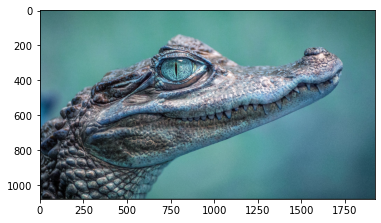

In [12]:
plt.imshow(img)

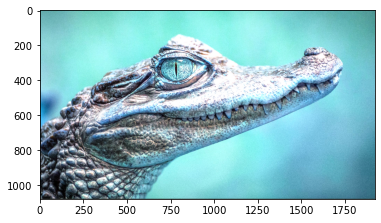

In [13]:
plt.imshow(img_bright)